# Владислава_Концевая

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [17]:
data = pd.read_csv('./train.csv')

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [18]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [19]:
# Смотрим, сколько и где содержится nan'ов
print(data.isnull().sum())

# Заменяем nan'ы на нули (т.к. пропущенные значения оказались только у вещественных признаков)
data = data.fillna(0)

# Проверяем, что больше nan'ов не осталось
print(data.isnull().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection        

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

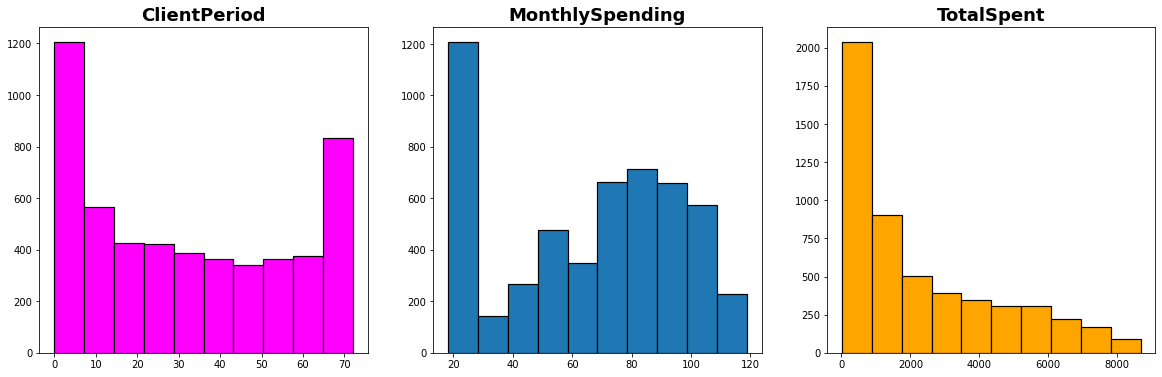

In [6]:
# Визуализация численных признаков
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 6)

ax[0].hist(data[num_cols[0]], edgecolor='black', linewidth=1.2, color='magenta')
ax[0].set_title(num_cols[0], fontweight="bold", size=18)

ax[1].hist(data[num_cols[1]], edgecolor='black', linewidth=1.2)
ax[1].set_title(num_cols[1], fontweight="bold", size=18)

ax[2].hist(data[num_cols[2]], edgecolor='black', linewidth=1.2, color='orange')
ax[2].set_title(num_cols[2], fontweight="bold", size=18)

plt.show()

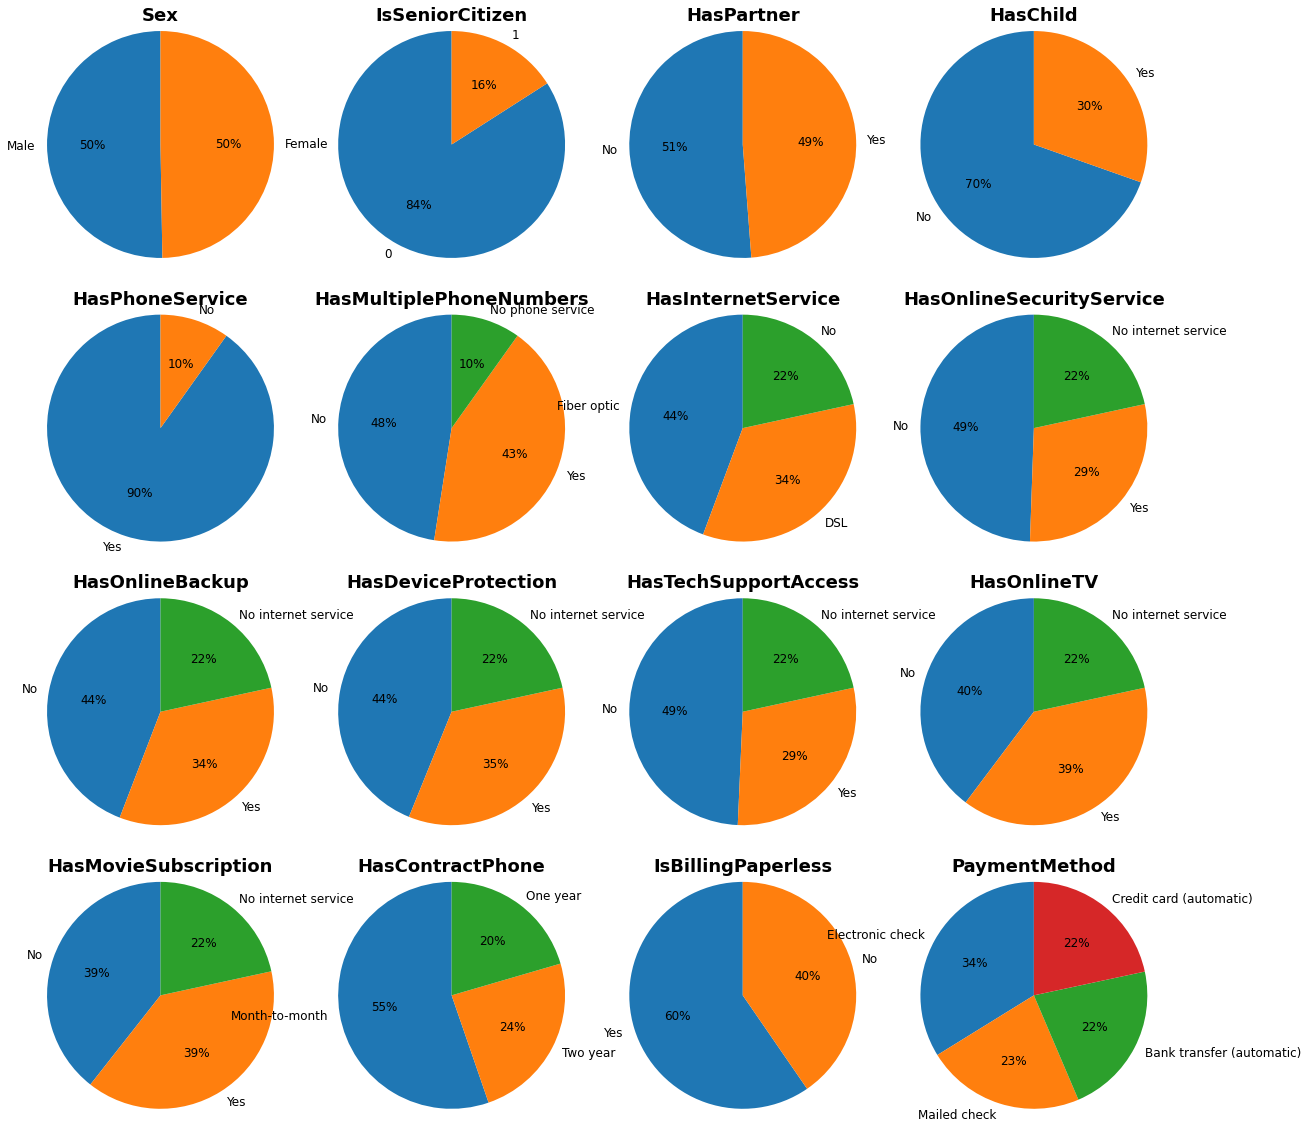

In [7]:
# Визуализация категориальных признаков
fig = plt.figure()
fig.set_size_inches(20, 20)

for idx, col in enumerate(cat_cols):
    sub = fig.add_subplot(4, 4, idx + 1)
    
    sub.pie(data[col].value_counts(), 
            labels=data[col].value_counts().index, 
            autopct='%.0f%%',
            textprops={'size': 'larger'}, 
            startangle=90,
            radius=1.2)
    
    sub.set_title(col, fontweight="bold", size=18)

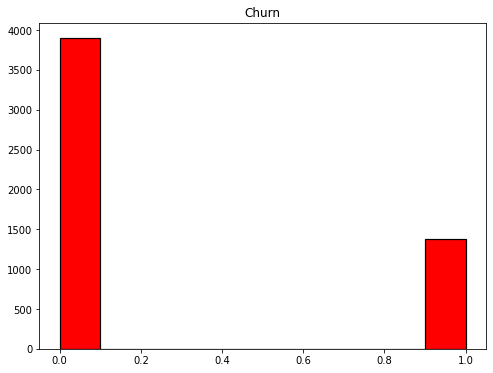

In [8]:
# Распределение целевой переменной
plt.figure(figsize=(8, 6))
plt.hist(data[target_col], edgecolor='black', linewidth=1.2, color='red')
plt.title(target_col)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [152]:
# Сначала кодируем категориальные признаки
enc = OneHotEncoder(drop='if_binary').fit(data[cat_cols])
X_cat = pd.DataFrame(enc.transform(data[cat_cols]).toarray())
X = pd.concat([data[num_cols], X_cat], axis=1)

In [153]:
X

,ClientPeriod,MonthlySpending,TotalSpent,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,35,36
0,55,19.50,1026.35,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [154]:
# Затем делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    data[target_col],
                                                    test_size=0.2,
                                                    random_state=42)

In [155]:
# Нормируем значения численных признаков
scaler = StandardScaler()
scaler.fit_transform(X_train[num_cols])
scaler.transform(X_test[num_cols])

array([[-0.95407411, -0.63848353, -0.82019257],
       [ 0.18448968,  0.18832755,  0.11838793],
       [ 0.71310859,  1.368066  ,  1.34495048],
       ...,
       [-0.99473711,  0.62575866, -0.70529442],
       [ 0.0625007 , -1.49346253, -0.70584417],
       [ 0.42846764, -1.50671802, -0.66298551]])

In [156]:
# Обучаем логистическую регрессию и заодно подбираем лучший параметр C
clf = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], 
                           cv=5, 
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           refit=True, 
                           random_state=42)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], cv=5, n_jobs=-1,
                     random_state=42, scoring='roc_auc')

In [157]:
y_pred = clf.predict_proba(X_test)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [158]:
# Лучший параметр
clf.C_

array([1.])

In [159]:
# Score
roc_auc_score(y_test, y_pred[:, 1])

0.8292959983745994

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [80]:
#!pip3 install CatBoost

In [20]:
from catboost import CatBoostClassifier

In [10]:
data.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod', 'Churn'],
      dtype='object')

In [154]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], 
                                                    data[target_col],
                                                    test_size=0.2,
                                                    random_state=42)

In [249]:
#!pip3 install ipywidgets ipython

In [280]:
##cat_clf = CatBoostClassifier(loss_function='Logloss', 
                             cat_features=cat_cols, 
                             eval_metric='AUC', 
                             depth=4, 
                             learning_rate=0.03, 
                             l2_leaf_reg=.6, 
                             penalties_coefficient=.01,
                             iterations=450)

In [156]:
estimators = [CatBoostClassifier(random_state=rnd, 
                                 iterations=460,
                                 loss_function='Logloss', 
                                 cat_features=cat_cols, 
                                 eval_metric='AUC', 
                                 depth=4, 
                                 learning_rate=.03, 
                                 l2_leaf_reg=.6,
                                 #leaf_estimation_iterations=2,
                                 penalties_coefficient=.01,
                                 silent=True) for rnd in [0, 4, 9, 109, 666, 1042, 1488, 3228, 10042, 100042]]
res = np.zeros(X_test.shape[0])
for est in estimators:
    est.fit(X_train, y_train)
    res += est.predict_proba(X_test)[:, 1]
res /= 10

In [157]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, res)

0.8300001847046111

In [158]:
X_test = pd.read_csv('./test.csv')  # Закомментировать, если активна предыдущая ячейка
submission = pd.read_csv('./submission.csv')

res = np.zeros(X_test.shape[0])
for est in estimators:
    res += est.predict_proba(X_test)[:, 1]
res /= 10

submission['Churn'] = res #np.where(res < .03, 0, res)
submission.to_csv('./my_submission.csv', index=False)

In [144]:
submission['Churn'][res < .1]

0       0.0
3       0.0
4       0.0
8       0.0
14      0.0
       ... 
1754    0.0
1755    0.0
1756    0.0
1757    0.0
1760    0.0
Name: Churn, Length: 684, dtype: float64

In [282]:
#cat_clf.fit(X_train, 
#            y_train, 
#            cat_features=cat_cols)   

#y_pred = cat_clf.predict_proba(X_test)

0:	total: 6.62ms	remaining: 2.97s
1:	total: 11.6ms	remaining: 2.6s
2:	total: 17.2ms	remaining: 2.56s
3:	total: 22.6ms	remaining: 2.52s
4:	total: 27.6ms	remaining: 2.45s
5:	total: 33.2ms	remaining: 2.46s
6:	total: 38.6ms	remaining: 2.44s
7:	total: 43.4ms	remaining: 2.4s
8:	total: 48.7ms	remaining: 2.39s
9:	total: 53.5ms	remaining: 2.35s
10:	total: 58.2ms	remaining: 2.32s
11:	total: 63ms	remaining: 2.3s
12:	total: 67.1ms	remaining: 2.26s
13:	total: 72.3ms	remaining: 2.25s
14:	total: 76.8ms	remaining: 2.23s
15:	total: 82.7ms	remaining: 2.24s
16:	total: 87.7ms	remaining: 2.23s
17:	total: 93.4ms	remaining: 2.24s
18:	total: 98.5ms	remaining: 2.23s
19:	total: 104ms	remaining: 2.24s
20:	total: 109ms	remaining: 2.23s
21:	total: 115ms	remaining: 2.23s
22:	total: 120ms	remaining: 2.22s
23:	total: 125ms	remaining: 2.22s
24:	total: 130ms	remaining: 2.21s
25:	total: 135ms	remaining: 2.19s
26:	total: 138ms	remaining: 2.16s
27:	total: 143ms	remaining: 2.16s
28:	total: 149ms	remaining: 2.16s
29:	total:

262:	total: 1.39s	remaining: 986ms
263:	total: 1.4s	remaining: 984ms
264:	total: 1.4s	remaining: 979ms
265:	total: 1.41s	remaining: 975ms
266:	total: 1.42s	remaining: 972ms
267:	total: 1.42s	remaining: 966ms
268:	total: 1.43s	remaining: 961ms
269:	total: 1.43s	remaining: 956ms
270:	total: 1.44s	remaining: 951ms
271:	total: 1.44s	remaining: 945ms
272:	total: 1.45s	remaining: 940ms
273:	total: 1.45s	remaining: 935ms
274:	total: 1.46s	remaining: 929ms
275:	total: 1.47s	remaining: 924ms
276:	total: 1.47s	remaining: 919ms
277:	total: 1.48s	remaining: 913ms
278:	total: 1.48s	remaining: 907ms
279:	total: 1.49s	remaining: 902ms
280:	total: 1.49s	remaining: 897ms
281:	total: 1.5s	remaining: 892ms
282:	total: 1.5s	remaining: 886ms
283:	total: 1.51s	remaining: 881ms
284:	total: 1.51s	remaining: 876ms
285:	total: 1.52s	remaining: 871ms
286:	total: 1.52s	remaining: 865ms
287:	total: 1.53s	remaining: 860ms
288:	total: 1.53s	remaining: 854ms
289:	total: 1.54s	remaining: 849ms
290:	total: 1.54s	remain

In [221]:
#cat_clf.get_all_params()

In [283]:
#roc_auc_score(y_test, y_pred[:, 1])

0.8301710364699255

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [284]:
best_model = cat_clf

In [160]:
# Запускать, только если модель не преобразует категориальные признаки
# X_test = pd.read_csv('./test.csv')
# X_test = X_test.fillna(0)
# X_test_cat = pd.DataFrame(enc.transform(X_test[cat_cols]).toarray())
# X_test = pd.concat([X_test[num_cols], X_test_cat], axis=1)

In [285]:
X_test = pd.read_csv('./test.csv')  # Закомментировать, если активна предыдущая ячейка
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

### Мой скор на kaggle: 0.85373

In [ ]:
#314648089

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.